# Dataton
## Bike Sharing Scheme

**Objetivo**: Predecir la cantidad de bicicletas que se alquilan

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
import xgboost

### Importando Train

In [191]:
train = pd.read_excel('bike_train.xlsx')
train.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

### Importando Test

In [192]:
test = pd.read_excel('bike_test.xlsx')
test.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0    12000 2012-05-20       2   1     5   4        0        0           0   
1    12001 2012-05-20       2   1     5   5        0        0           0   
2    12002 2012-05-20       2   1     5   6        0        0           0   
3    12003 2012-05-20       2   1     5   7        0        0           0   
4    12004 2012-05-20       2   1     5   8        0        0           0   

   weathersit  temp   atemp   hum  windspeed  
0           1  0.52  0.5000  0.68     0.0896  
1           1  0.50  0.4848  0.72     0.1045  
2           1  0.50  0.4848  0.63     0.1343  
3           1  0.52  0.5000  0.68     0.1940  
4           1  0.56  0.5303  0.56     0.1642

### Desripción de las columnas

De acuerdo con el diccionario de datos, las columnas aportan la siguiente información

| Columna | Descripción |
|:-------:|:-------------:|
|instant|Identificador del registro|
|dteday|Fecha del registro|
|season|Temporada <br> 1: primavera <br> 2: verano <br> 3: otoño <br> 4: invierno|
|yr|Año del registro|
|mnth|Mes del registro|
|holiday|Si el día meteorológico es feriado toma el valor de 1, día normal toma el valor 0|
|weekday|Dia de la semana|
|workday|Si el día es laboral toma el valor de 1, en caso contrario 0|
|weathersit|Indica el tipo de clima que hubo en el momento del registro, las opciones son:<br>1: Despejado, algunas nubes o parcialmente nublado<br>2: Neblina con nubes, neblina con nubes fragmentadas, neblina con algunas nubes o sólo neblina<br>3: Nieve ligera, llovizna con tormenta eléctrica y nubes dispersas o llovizna con nubes dispersas<br>4: Lluvia con granizos, tormenta eléctrica y neblina, o nieve con niebla|
|temp|Temperatura normalizada en gradus Celsius. La escala llega hasta un máximo de 50°C|
|hum|Nivel de humedad normalizada. La escala llega a un máximo de 100|
|windspeed|Velocidad del viento normalizada. La escala llega a un máximo de 67 km/h|
|casual|Cantidad de usuarios casuales en el registro, siendo aquellos que no están registrados|
|registered|Cantidad de usuarios registrados en el registro|
|cnt|Cantidad total de bicicletas rentadas en el registro, incluyendo ambos tipos de usuarios (casuales y registrados)|

In [193]:
train.describe()

instant        season            yr          mnth            hr  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean    6000.000000      2.210684      0.279523      5.530294     11.556630   
std     3463.957275      1.088798      0.448784      3.433005      6.911891   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3000.500000      1.000000      0.000000      3.000000      6.000000   
50%     6000.000000      2.000000      0.000000      5.000000     12.000000   
75%     8999.500000      3.000000      1.000000      8.000000     18.000000   
max    11999.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.027752      3.009334      0.684057      1.435036      0.465704   
std        0.164269      2.005264      0.464910      0.650894      0.188576   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.320000   
50%        0.000000      3.000000      1.000000      1.000000      0.460000   
75%        0.000000      5.000000      1.000000      2.000000      0.620000   
max        1.000000      6.000000      1.000000      4.000000      0.960000   

              atemp           hum     windspeed        casual    registered  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.448888      0.625770      0.196433     30.049837    128.545129   
std        0.169633      0.200637      0.125394     43.596915    124.692750   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.303000      0.470000      0.104500      3.000000     29.000000   
50%        0.454500      0.620000      0.194000     13.000000     98.000000   
75%        0.590900      0.790000      0.283600     39.000000    185.000000   
max        1.000000      1.000000      0.850700    367.000000    770.000000   

                cnt  
count  11999.000000  
mean     158.594966  
std      151.392952  
min        1.000000  
25%       34.000000  
50%      118.000000  
75%      232.000000  
max      957.000000

In [194]:
test.describe()

instant       season      yr         mnth           hr  \
count   5380.000000  5380.000000  5380.0  5380.000000  5380.000000   
mean   14689.500000     3.150558     1.0     8.784758    11.524721   
std     1553.216555     0.839184     0.0     2.145166     6.920601   
min    12000.000000     1.000000     1.0     5.000000     0.000000   
25%    13344.750000     3.000000     1.0     7.000000     6.000000   
50%    14689.500000     3.000000     1.0     9.000000    12.000000   
75%    16034.250000     4.000000     1.0    11.000000    18.000000   
max    17379.000000     4.000000     1.0    12.000000    23.000000   

           holiday      weekday  workingday   weathersit         temp  \
count  5380.000000  5380.000000  5380.00000  5380.000000  5380.000000   
mean      0.031041     2.991078     0.67974     1.403532     0.566758   
std       0.173444     2.007032     0.46662     0.612343     0.182800   
min       0.000000     0.000000     0.00000     1.000000     0.140000   
25%       0.000000     1.000000     0.00000     1.000000     0.400000   
50%       0.000000     3.000000     1.00000     1.000000     0.600000   
75%       0.000000     5.000000     1.00000     2.000000     0.700000   
max       1.000000     6.000000     1.00000     3.000000     1.000000   

             atemp          hum    windspeed  
count  5380.000000  5380.000000  5380.000000  
mean      0.535741     0.630483     0.175968  
std       0.161300     0.174493     0.113988  
min       0.151500     0.160000     0.000000  
25%       0.409100     0.490000     0.104500  
50%       0.575800     0.640000     0.164200  
75%       0.666700     0.780000     0.253700  
max       0.924200     1.000000     0.656700

### Exploración de datos

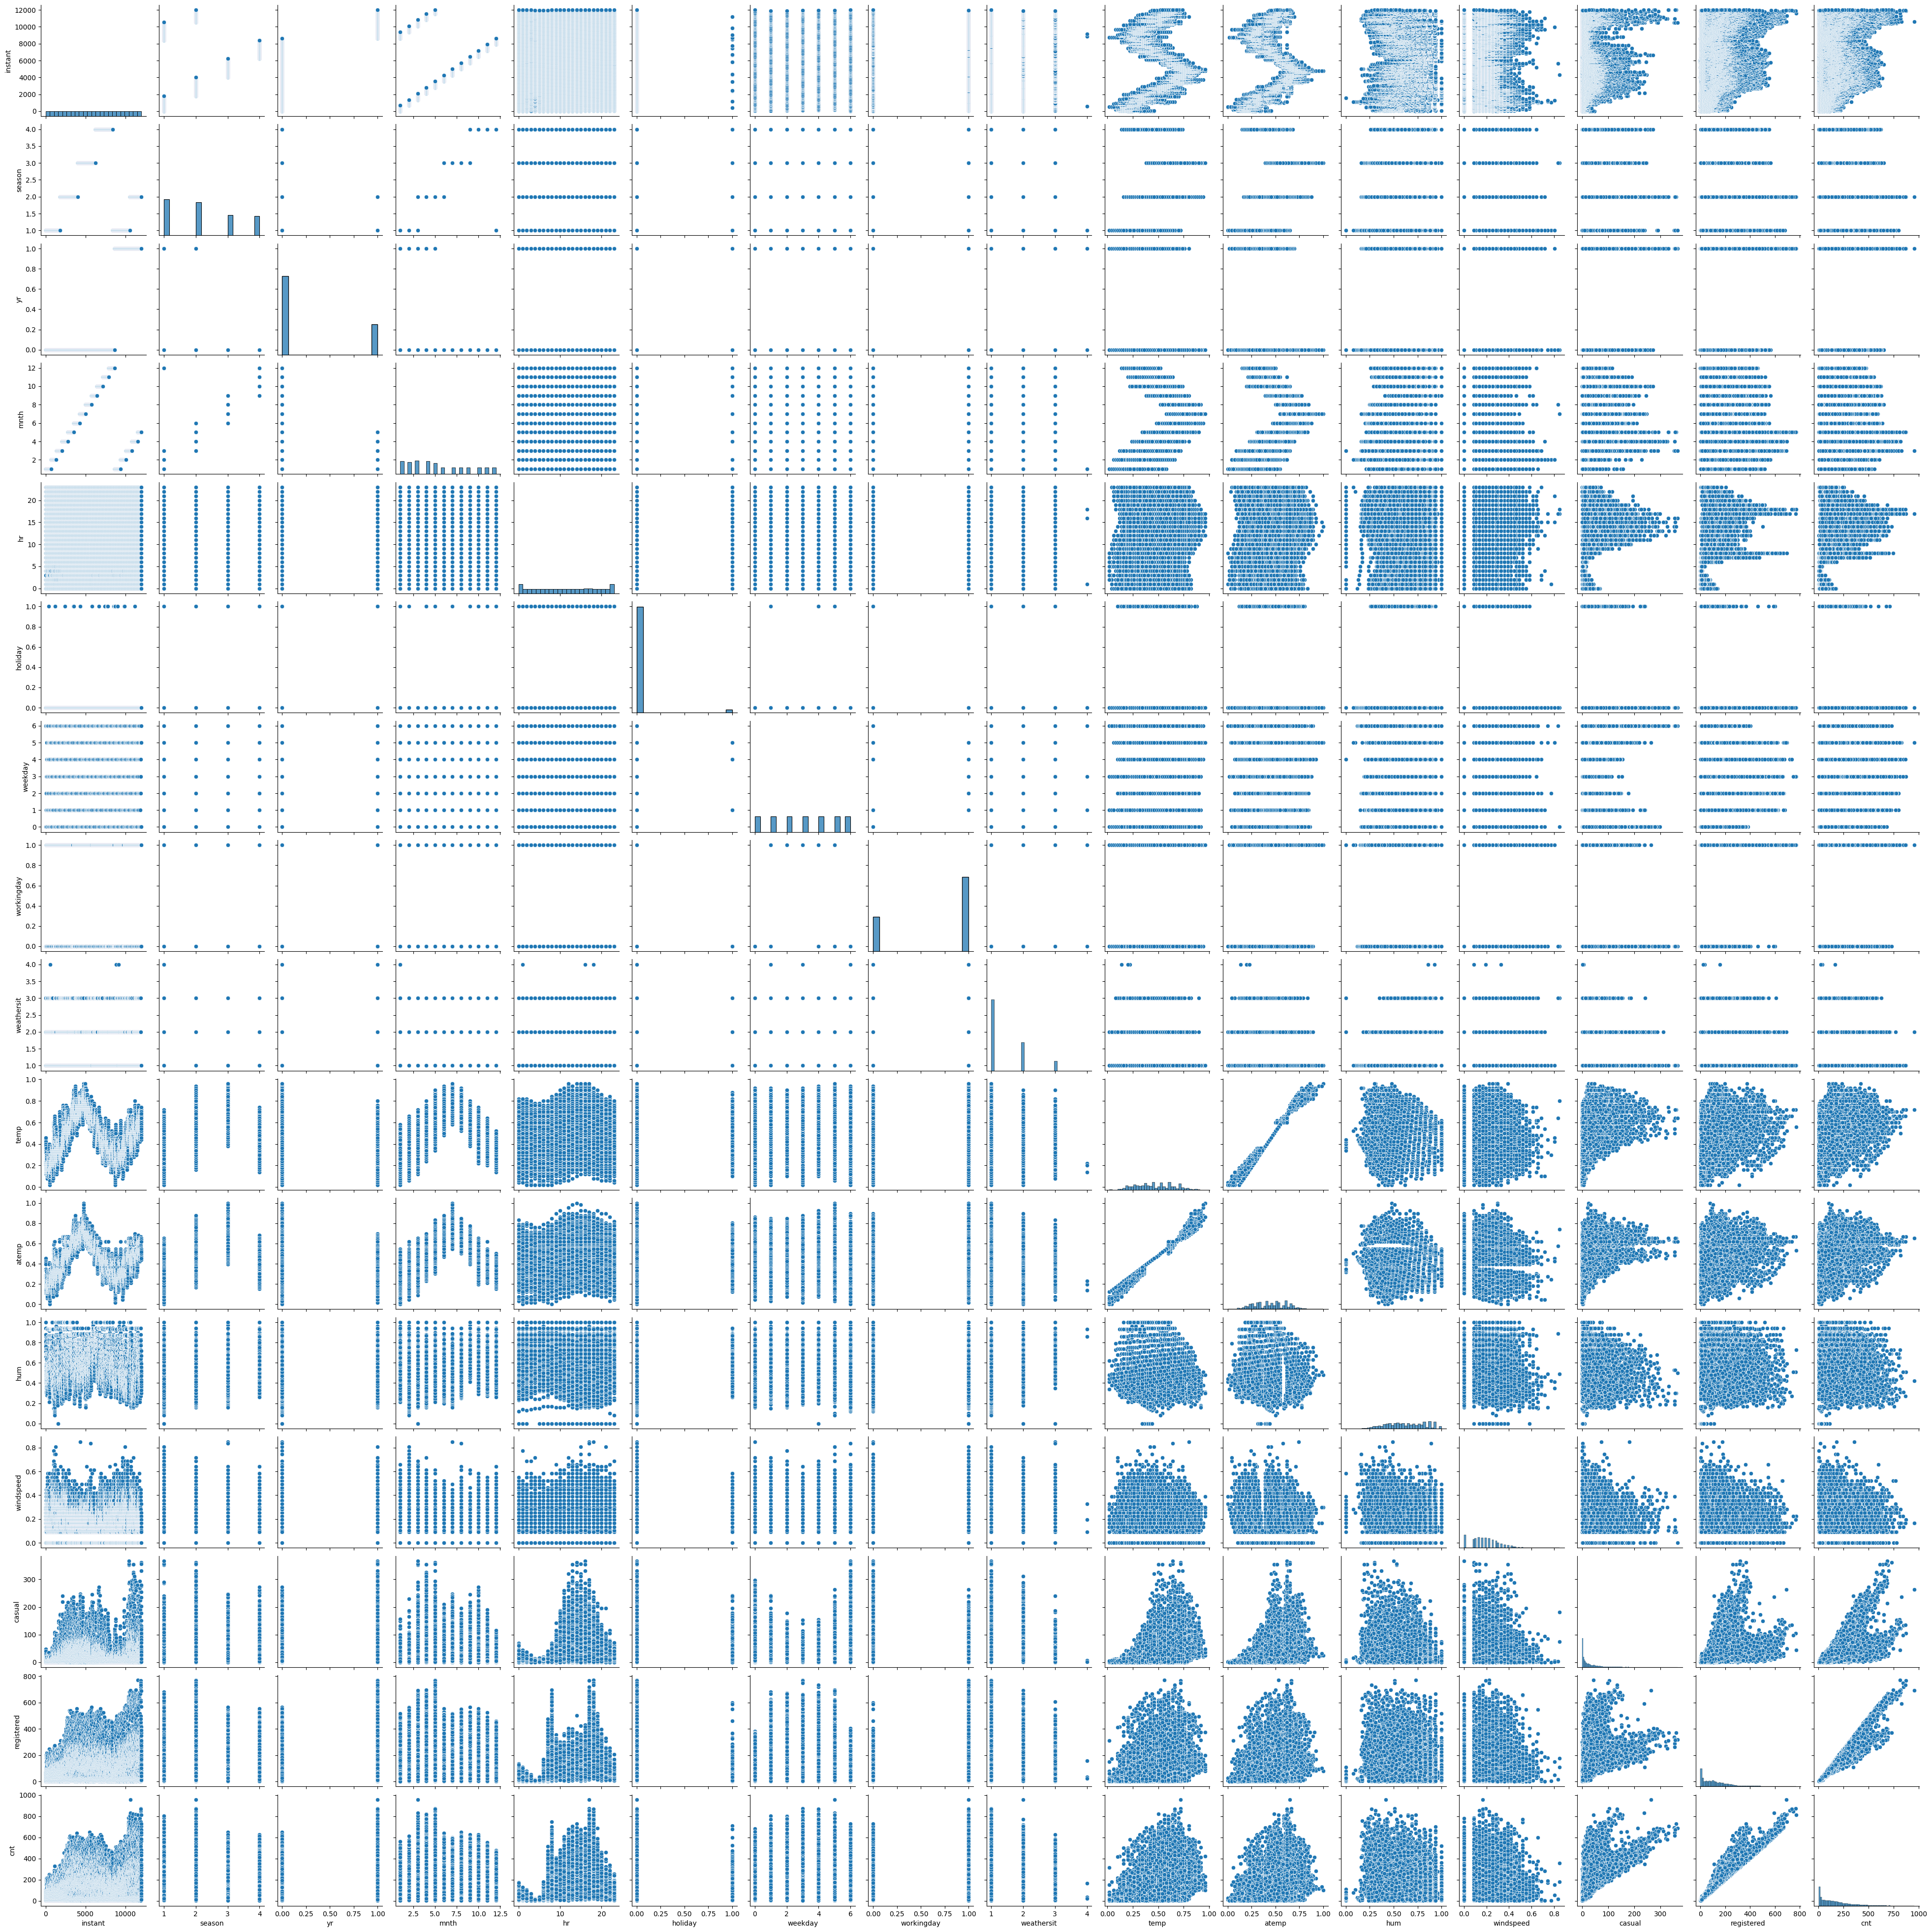

In [195]:
sns.pairplot(train)

Text(0, -0.02, 'La linea roja muestra el promedio de las observaciones')

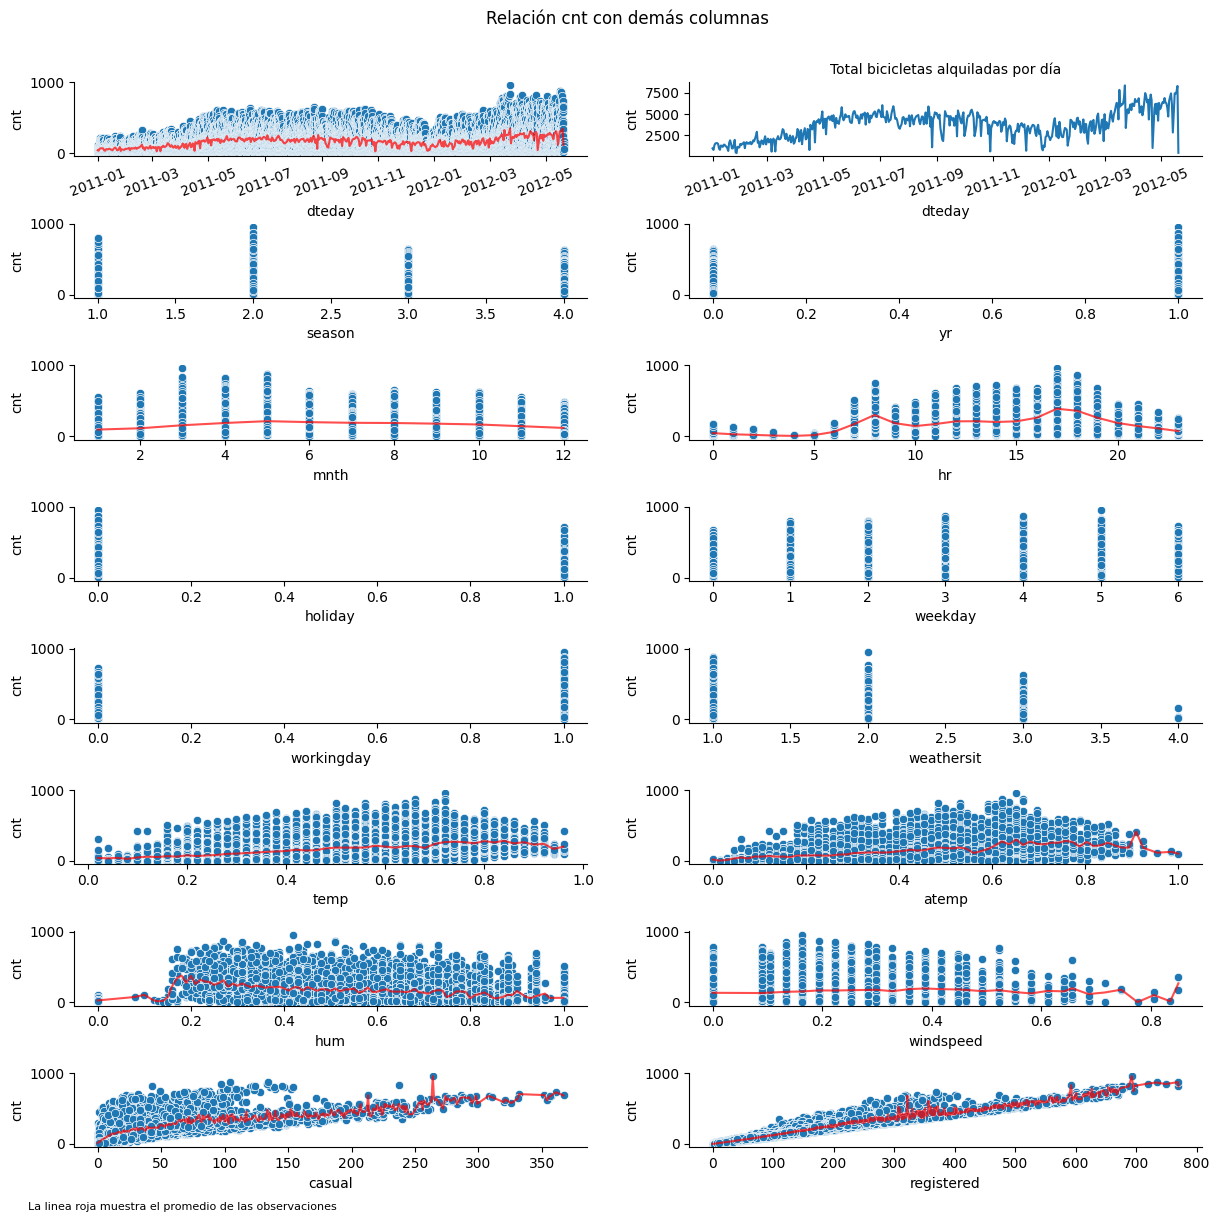

In [196]:
fig, ax = plt.subplots(8, 2, figsize=(12,12))
fig.tight_layout()
fig.subplots_adjust(top=0.92)
ax = ax.flatten()
i = 0
x = train.columns.drop(['instant', 'cnt'])

for column in x:
    sns.scatterplot(ax=ax[i], x=column, y='cnt', data=train)
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('cnt')

    if i == 0:
        sns.lineplot(ax=ax[i], x=column, y='cnt', data=train, estimator='mean', ci=None, color='red', alpha=0.7)

    if column == 'dteday':
        ax[i].tick_params('x', labelrotation=20)
        i += 1
        sns.lineplot(ax=ax[i], x=column, y='cnt', data=train, estimator='sum', ci=None)
        ax[i].tick_params('x', labelrotation=20)
        ax[i].set_title('Total bicicletas alquiladas por día', fontsize=10)
    
    if column != 'season' and column != 'yr' and column != 'holiday' and column != 'weekday' and\
         column != 'workingday' and column != 'weathersit' and i != 1:
         sns.lineplot(ax=ax[i], x=column, y='cnt', data=train, estimator='mean', ci=None, color='red', alpha=0.7)

    i += 1

plt.suptitle('Relación cnt con demás columnas', fontsize=12)
plt.subplots_adjust(hspace=0.9, wspace=0.2)
sns.despine(left=False, bottom=False)
fig.text(
    0, -0.02, 'La linea roja muestra el promedio de las observaciones', color="black", 
    fontsize=8
)

Al realizar el pairplot se encuentra dificil observar la información debido al número de columnas. Sin embargo, se encuentran patrones interesantes especialmente cuando se grafican la relación entre las variables climáticas. Pero la relación que más nos interesa es la relación entre nuestra variable objetivo y las demás columnas. Así pues se graficaron dichas relaciones, con excepción de aquellas que no aportan información alguna.

Se observa en los datos un incremento en el alquiler de bicicletas a lo largo de los años visibles en el dataset, aunque se observa un leve decrecimiento durante el invierno de 2011-2012. Lo cual es lógico ya que no demasiadas personas suelen montar bicicleta durante dicha temporada. Al graficar el alquiler diario de bicicletas durante las diferentes temporadas, se observa que durante el invierno suele disminuir aunque los valores se encuentran muy cercanos a los valores de alquiler en otoño. Donde si se llega a ver una diferencia es en la grafica mensual y en la gráfica de temperatura. En ellas se puede observar como el total de alquier disminuye durante los meses de enero y diciembre y cuando las temperaturas suelen ser bajas. Al hablar de temperaturas también se puede observar que a temperaturas ambientales y sensación térmica, los alquileres también disminuyen. Esto debido a que realizar actividad física durante temporadas de temperaturas altas puede implicar efectos adversos a la salud. De igual manera, la cantidad de bicicletas alquiladas disminuye considerablemente cuando hay condiciones climáticas adversas, tales como lluvias, nevadas y vientos fuertes.

También se puede observar que la columna de año no muestra demasiada información ya que la diferencia entre sus valores es poca y lo que se puede obtener de esta columna es que de un año a otro han incrementado el número de bicicletas alquiladas. Por su lado holiday y working day si bien también tienen diferencias pequeñas deben continuar en el dataset ya que estas columnas muestran diferencias en los números de bicicletas alquiladas en los días no laborales y feriados.



### Selección de Features

Text(0.5, 1.0, 'Correlación de variables')

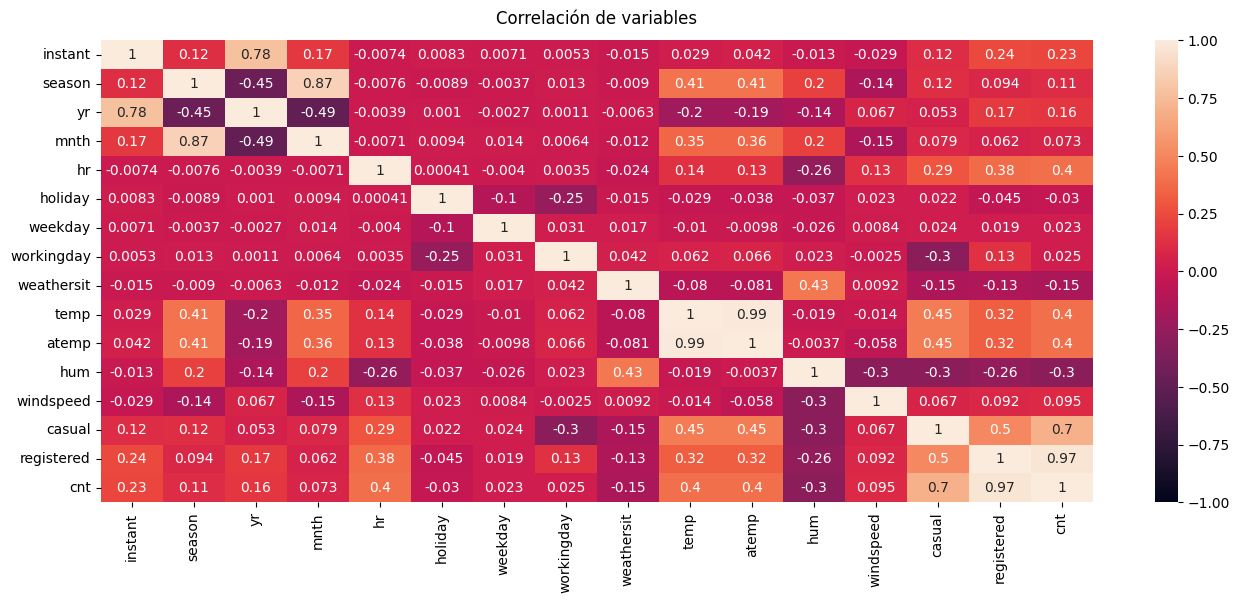

In [197]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlación de variables', fontdict={'fontsize':12}, pad=12)

De acuerdo al mapa de calor no hay correlaciones fuertes entre las columnas y la variable objetivo. Las columnas con mayor correlación son hr, temp y atemp. Exluyo casual y registered ya que son columnas que forman la variable objetivo y no se iban a tener en cuenta para realizar la predicción. Ahora bien si miramos la correlación entre temp y atemp, encontramos que ambas tienen una correlación fuerte entre ellas ya que una mide la temperatura ambiente y la otra la sensación térmica, por lo que se puede excluir a una de ellas. Instant tiene una correlación fuerte con yr, pero al ser una columna que identifica el registro tampoco se tiene en cuenta. Mientras que season y month se debe debatir sobre su uso. Season categoriza los meses de acuerdo a las temporadas climáticas, por lo que month representaría mejor los datos. Adicionalmente las caracteristicas de cada temporada se pueden explicar usando las variables climáticas. Así pues las columnas a usar son:

|Columnas|
|:------:|
|mnth|
|hr|
|holiday|
|weekday|
|workingday|
|weathersit|
|temp|
|hum|
|windspeed|

### Evaluación de modelos

Se seleccionaron los siguientes modelos
* Linear Regression
* Lasso Regression
* Ridge Regression
* Polynomial Regression
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor
* XGBoost Regressor
* LGBMRegressor

Se usará el dataset de train para evaluar los modelos usando validación cruzada en 10 folds y RMSE como metrica de evaluación

#### Preprocesamiento para PolynomialRegression

Para poder aplicar una regresión polinomica se debe transformar las features para que encajen en cada modelo del polinomio, se decidió usar solo polinomios de 2do, 3er y 4to grado.

In [198]:
X = train[['mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
           'temp', 'hum', 'windspeed']]

y = train[['cnt']]

In [199]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_f_2 = poly_2.fit_transform(X)

poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly_f_3 = poly_3.fit_transform(X)

poly_4 = PolynomialFeatures(degree=4, include_bias=False)
poly_f_4 = poly_4.fit_transform(X)

Para realizar la evaluación de los modelos, primero se usan los modelos por defecto, luego se tomará el mejor y se aplicará una optimización para encontrar el mejor valor posible

In [200]:
models = [
    ('LinearRegression', LinearRegression()),
    ('LassoRegression', Lasso()),
    ('RidgeRegression', Ridge()),
    ('PolynomialRegression2', LinearRegression()),
    ('PolynomialRegression3', LinearRegression()),
    ('PolynomialRegression4', LinearRegression()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('GradientBoostingRegressor', GradientBoostingRegressor()),
    ('XGBoostRegressor', XGBRegressor()),
    ('LGBMRegressor', LGBMRegressor())
]

In [201]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=20, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_root_mean_squared_error')
    results.append(np.mean(cv_results))
    names.append(name)

    if model == 'PolynomialRegression2':
        cv_results = cross_val_score(model, poly_f_2, y, cv=kfold, scoring='neg_root_mean_squared_error')
        results.append(np.mean(cv_results))
        names.append(name)
    elif model == 'PolynomialRegression3':
        cv_results = cross_val_score(model, poly_f_3, y, cv=kfold, scoring='neg_root_mean_squared_error')
        results.append(np.mean(cv_results))
        names.append(name)
    elif model == 'PolynomialRegression4':
        cv_results = cross_val_score(model, poly_f_4, y, cv=kfold, scoring='neg_root_mean_squared_error')
        results.append(np.mean(cv_results))
        names.append(name)

results_df = pd.DataFrame(results, index=names, columns=['neg_rmse'])

c:\Users\maale\anaconda3\envs\Streamlit\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\maale\anaconda3\envs\Streamlit\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\maale\anaconda3\envs\Streamlit\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\maale\anaconda3\envs\Streamlit\lib\site-packages\sklearn\model_selection\_va

Text(0.5, 1.0, 'RMSE modelos sin optimizar')

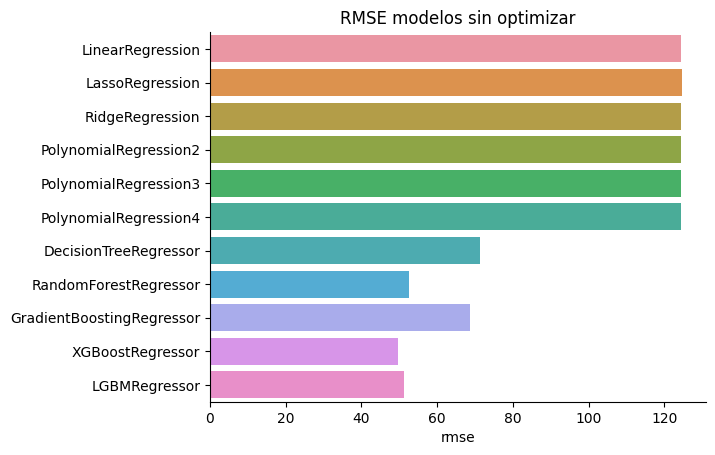

In [202]:
results_df['rmse'] = results_df['neg_rmse'] * -1
sns.barplot(y=results_df.index, x='rmse', data=results_df)
sns.despine(left=False, bottom=False)
plt.title('RMSE modelos sin optimizar')

In [203]:
results_df

neg_rmse        rmse
LinearRegression          -124.503056  124.503056
LassoRegression           -124.756650  124.756650
RidgeRegression           -124.502850  124.502850
PolynomialRegression2     -124.503056  124.503056
PolynomialRegression3     -124.503056  124.503056
PolynomialRegression4     -124.503056  124.503056
DecisionTreeRegressor      -71.423015   71.423015
RandomForestRegressor      -52.565957   52.565957
GradientBoostingRegressor  -68.563764   68.563764
XGBoostRegressor           -49.771109   49.771109
LGBMRegressor              -51.324592   51.324592

El mejor modelo encontrado hasta el momento es XGBoostRegressor con un RMSE de 49.8 en validación cruzada, por lo tanto es el modelo que se usará para continuar con la predicción

### Primera predicción con XGBoost

In [204]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = XGBRegressor()
model.fit(x_train, y_train)
train_pred = model.predict(x_train)
train_error = mean_squared_error(y_train, train_pred, squared=False)
test_pred = model.predict(x_test)
test_error = mean_squared_error(y_test, test_pred, squared=False)

print(f'Train error: {train_error}')
print(f'Test error: {test_error}')

Train error: 31.799492698542046
Test error: 50.66249819061248


[0]	validation_0-rmse:165.32317	validation_1-rmse:162.56182
[1]	validation_0-rmse:128.67212	validation_1-rmse:125.52324
[2]	validation_0-rmse:103.07578	validation_1-rmse:100.52162
[3]	validation_0-rmse:87.36383	validation_1-rmse:85.20610
[4]	validation_0-rmse:77.51229	validation_1-rmse:76.15300
[5]	validation_0-rmse:69.26822	validation_1-rmse:68.70066
[6]	validation_0-rmse:64.71949	validation_1-rmse:65.00577
[7]	validation_0-rmse:60.38100	validation_1-rmse:61.56924
[8]	validation_0-rmse:57.97410	validation_1-rmse:59.58173
[9]	validation_0-rmse:56.40352	validation_1-rmse:58.39338
[10]	validation_0-rmse:54.48376	validation_1-rmse:56.94900
[11]	validation_0-rmse:53.61844	validation_1-rmse:56.44119
[12]	validation_0-rmse:52.43058	validation_1-rmse:55.76546
[13]	validation_0-rmse:51.23987	validation_1-rmse:55.28954
[14]	validation_0-rmse:50.38013	validation_1-rmse:54.70210
[15]	validation_0-rmse:49.58750	validation_1-rmse:54.29471
[16]	validation_0-rmse:49.00899	validation_1-rmse:54.11745
[

Text(0.5, 1.0, 'XGBRegressor - RMSE')

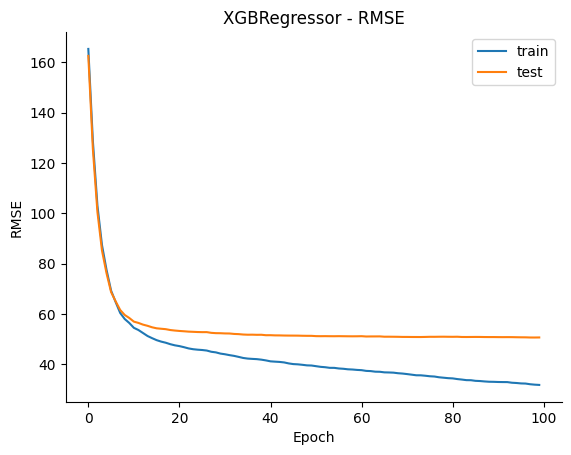

In [205]:
model = XGBRegressor(eval_metric='rmse')
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_set=eval_set, verbose=True)
train_pred = model.predict(x_train)
train_pred_rounded = [round(value, 0) for value in train_pred]
train_error = mean_squared_error(y_train, train_pred_rounded)
test_pred = model.predict(x_test)
test_pred_rounded = [round(value, 0) for value in test_pred]
test_error = mean_squared_error(y_test, test_pred_rounded)
#Metricas de performance
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

sns.lineplot(x=x_axis, y=results['validation_0']['rmse'], label='train')
sns.lineplot(x=x_axis, y=results['validation_1']['rmse'], label='test')
sns.despine(left=False, bottom=False)
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.title('XGBRegressor - RMSE')

Sin realizar optimización se obtiene un modelo con overfit, lo cual era esperado. Para solucionarlo se realizará una optimización de hiperparametros.

Al realizar un grafico con el número de epochs del modelo y los errores de entrenamiento y prueba, se encuentra que a partir del 11vo o 12vo epoch la diferencia entre entrenamiento y prueba sobrepasa los 4 puntos y empieza a aumentar a medida que continuan los epochs disminuyendo la calidad del aprendizaje en la porción de entrenamiento. Así pues, se puede pensar en mejorar el modelo usando una detención temprana alrededor del epoch 11 o 12.

#### Detención temprana

Para aplicar este método de optimización se debe pasar el argumento early_stopping_rounds al momento de crear el modelo. Este argumento establece el número de epochs en los que no se presenta ninguna mejora y así detener la iteración del modelo

[0]	validation_0-rmse:166.97607	validation_1-rmse:163.93679
[1]	validation_0-rmse:131.50975	validation_1-rmse:128.38521
[2]	validation_0-rmse:106.89073	validation_1-rmse:104.20657
[3]	validation_0-rmse:91.65804	validation_1-rmse:89.86046
[4]	validation_0-rmse:82.37490	validation_1-rmse:81.57531
[5]	validation_0-rmse:73.84655	validation_1-rmse:73.73477
[6]	validation_0-rmse:69.66585	validation_1-rmse:70.56006
[7]	validation_0-rmse:64.56680	validation_1-rmse:66.29517
[8]	validation_0-rmse:62.16665	validation_1-rmse:64.53509
[9]	validation_0-rmse:60.41787	validation_1-rmse:63.49893
[10]	validation_0-rmse:58.31859	validation_1-rmse:61.93210
[11]	validation_0-rmse:57.07096	validation_1-rmse:61.12896
[12]	validation_0-rmse:56.50325	validation_1-rmse:60.78321
[13]	validation_0-rmse:55.51413	validation_1-rmse:60.28833
[14]	validation_0-rmse:54.27985	validation_1-rmse:59.67032
[15]	validation_0-rmse:53.67560	validation_1-rmse:59.47134
[16]	validation_0-rmse:53.35361	validation_1-rmse:59.25763
[

Text(0.5, 1.0, 'XGBRegressor - RMSE - Detención temprana')

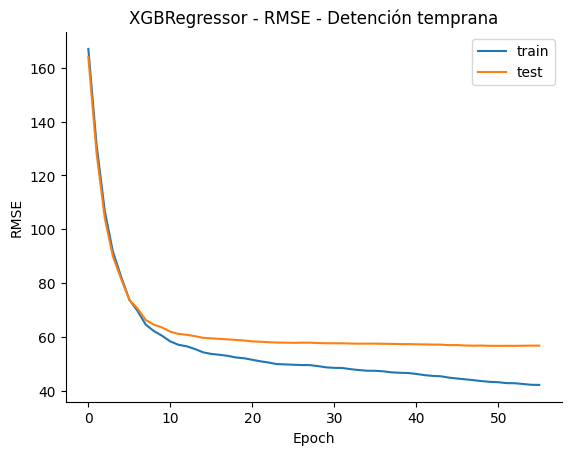

In [218]:
model = XGBRegressor(eval_metric='rmse', early_stopping_rounds=5)
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_set=eval_set, verbose=True)
test_pred = model.predict(x_test)
test_pred_rounded = [round(value, 0) for value in test_pred]
test_error = mean_squared_error(y_test, test_pred_rounded)
#Metricas de performance
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

sns.lineplot(x=x_axis, y=results['validation_0']['rmse'], label='train')
sns.lineplot(x=x_axis, y=results['validation_1']['rmse'], label='test')
sns.despine(left=False, bottom=False)
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.title('XGBRegressor - RMSE - Detención temprana')

In [219]:
print(model.best_score)
print(model.best_iteration)

56.6797851999727
50


La detención temprana si bien reduce el número de iteraciones que se realizan, sigue sin mejorar el modelo, así pues, se tratará de reducir el número de features usando feature importance

#### Feature Importance

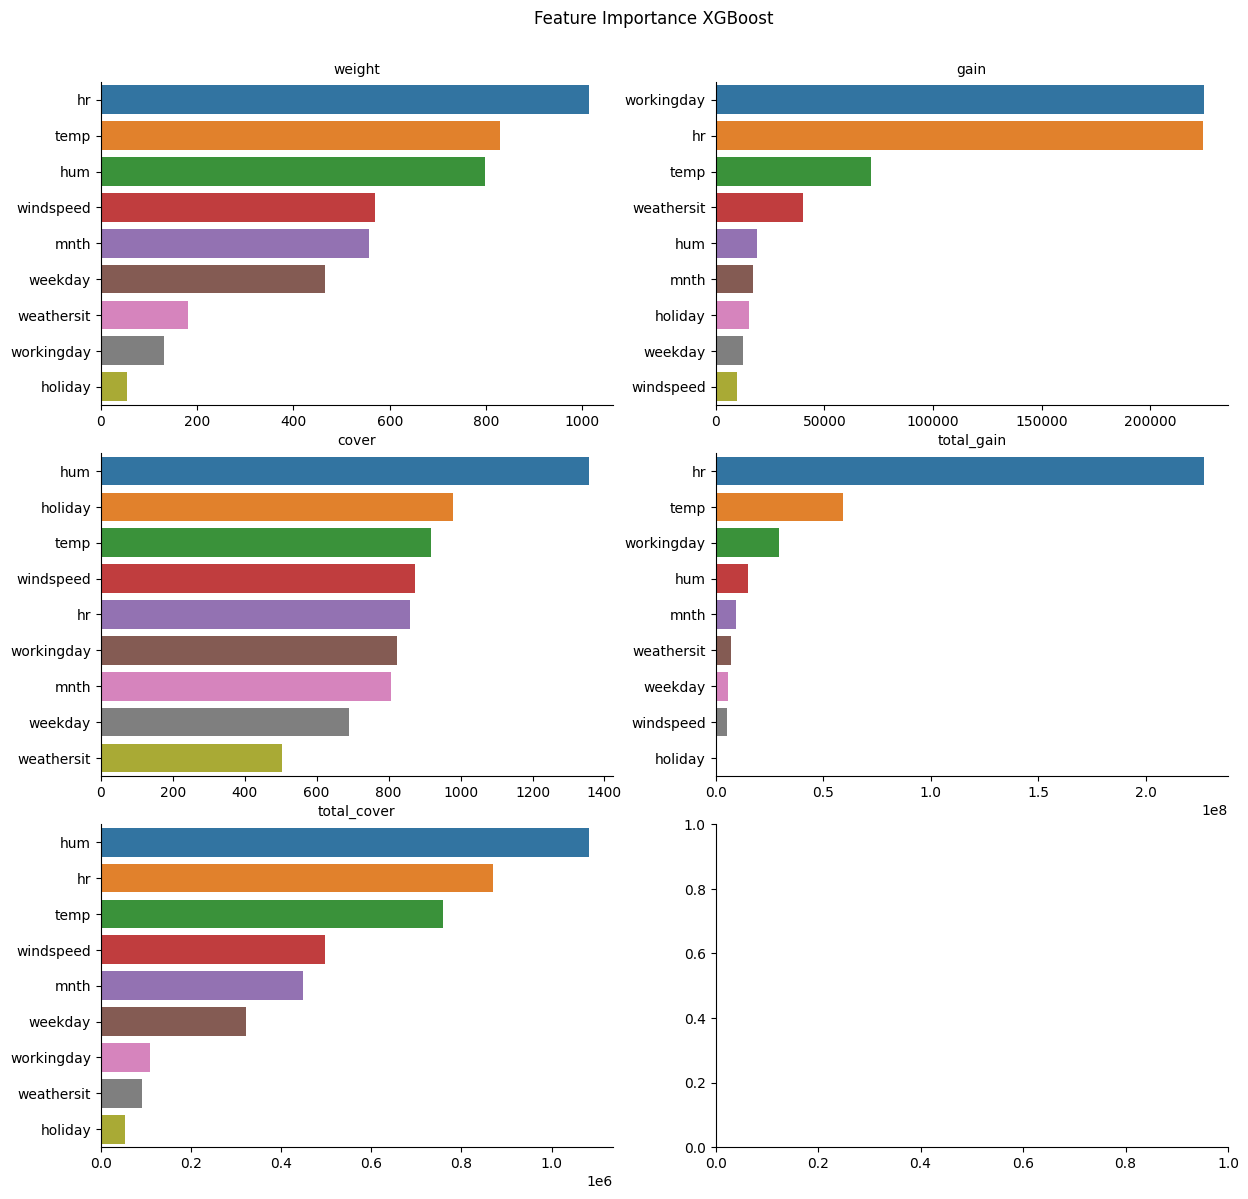

In [207]:
fig, ax = plt.subplots(3, 2, figsize=(12,12))
fig.tight_layout()
fig.subplots_adjust(top=0.92)
ax = ax.flatten()
i = 0
types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

for type in types:
    scores = model.get_booster().get_score(importance_type=type)
    scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    values = []
    names = []
    for item in scores:
        names.append(item[0])
        values.append(item[1])
    sns.barplot(ax=ax[i], x=values, y=names)
    ax[i].set_title(type, fontsize=10)
    i += 1

plt.suptitle('Feature Importance XGBoost', fontsize=12)
plt.subplots_adjust(hspace=0.15, wspace=0.2)
sns.despine(left=False, bottom=False)

Es bien sabido que de los tipos de puntaje para encontrar la importancia de features, la más relevante es Gain. Sin embargo, en este caso, Gain apenas da 3 features para usar y esto puede generarr problemas. Así pues, lo mejor sería probar los features con mayor importancia en cada tipo y comparar los resultados finales, de la misma manera que se evaluaron los modelos a aplicar

Text(0.5, 1.0, 'RMSE XGBoost, por tipo de score para feature importance')

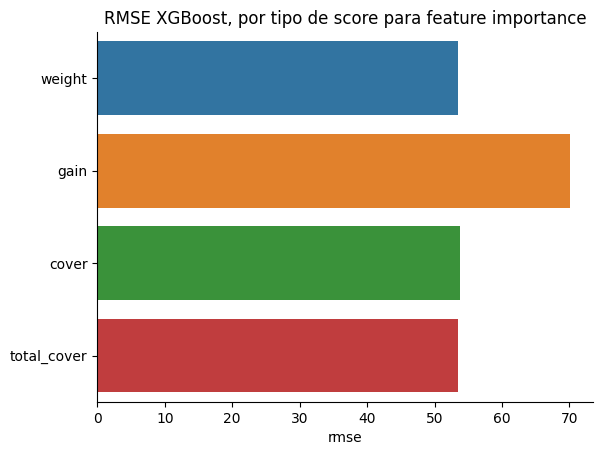

In [208]:
sets = [
    ("weight", X[['hr', 'temp', 'hum', 'windspeed', 'mnth', 'weekday']]),
    ("gain", X[['workingday', 'hr', 'temp']]),
    ("cover", X[['hum', 'holiday', 'temp', 'windspeed', 'workingday', 'hr', 'mnth']]),
    ("total_cover", X[['hum', 'hr', 'temp', 'windspeed', 'mnth', 'weekday']])
]

model = XGBRegressor()
results = []
names = []
for name, data in sets:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, data, y, cv=kfold, scoring='neg_root_mean_squared_error')
    results.append(np.mean(cv_results))
    names.append(name)

results_df = pd.DataFrame(results, index=names, columns=['neg_rmse'])
results_df['rmse'] = results_df['neg_rmse'] * -1

sns.barplot(y=results_df.index, x='rmse', data=results_df)
sns.despine(left=False, bottom=False)
plt.title('RMSE XGBoost, por tipo de score para feature importance')

In [209]:
results_df

neg_rmse       rmse
weight      -53.512309  53.512309
gain        -70.043667  70.043667
cover       -53.776639  53.776639
total_cover -53.527478  53.527478

El menor RMSE es dado por los features dados por weight. Se probará el modelo usando dichas features tal como se probó el modelo inicial

In [210]:
X = X[['hr', 'temp', 'hum', 'windspeed', 'mnth', 'weekday']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = XGBRegressor()
model.fit(x_train, y_train)
train_pred = model.predict(x_train)
train_error = mean_squared_error(y_train, train_pred, squared=False)
test_pred = model.predict(x_test)
test_error = mean_squared_error(y_test, test_pred, squared=False)

print(f'Train error: {train_error}')
print(f'Test error: {test_error}')

Train error: 35.28352136473982
Test error: 56.39256748371222


[0]	validation_0-rmse:166.97607	validation_1-rmse:163.93679
[1]	validation_0-rmse:131.50975	validation_1-rmse:128.38521
[2]	validation_0-rmse:106.89073	validation_1-rmse:104.20657
[3]	validation_0-rmse:91.65804	validation_1-rmse:89.86046
[4]	validation_0-rmse:82.37490	validation_1-rmse:81.57531
[5]	validation_0-rmse:73.84655	validation_1-rmse:73.73477
[6]	validation_0-rmse:69.66585	validation_1-rmse:70.56006
[7]	validation_0-rmse:64.56680	validation_1-rmse:66.29517
[8]	validation_0-rmse:62.16665	validation_1-rmse:64.53509
[9]	validation_0-rmse:60.41787	validation_1-rmse:63.49893
[10]	validation_0-rmse:58.31859	validation_1-rmse:61.93210
[11]	validation_0-rmse:57.07096	validation_1-rmse:61.12896
[12]	validation_0-rmse:56.50325	validation_1-rmse:60.78321
[13]	validation_0-rmse:55.51413	validation_1-rmse:60.28833
[14]	validation_0-rmse:54.27985	validation_1-rmse:59.67032
[15]	validation_0-rmse:53.67560	validation_1-rmse:59.47134
[16]	validation_0-rmse:53.35361	validation_1-rmse:59.25763
[

Text(0.5, 1.0, 'XGBRegressor - RMSE')

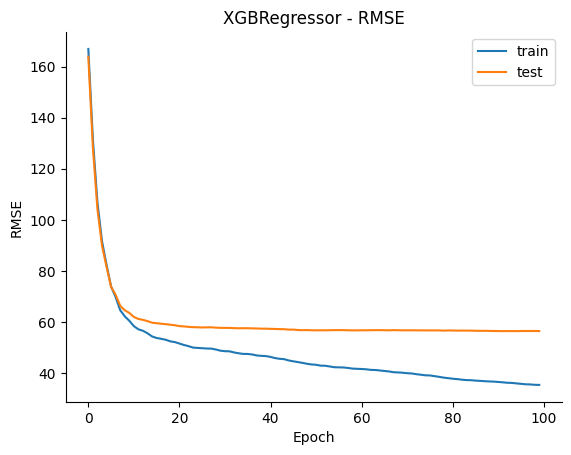

In [211]:
model = XGBRegressor(eval_metric='rmse')
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_set=eval_set, verbose=True)
train_pred = model.predict(x_train)
train_pred_rounded = [round(value, 0) for value in train_pred]
train_error = mean_squared_error(y_train, train_pred_rounded)
test_pred = model.predict(x_test)
test_pred_rounded = [round(value, 0) for value in test_pred]
test_error = mean_squared_error(y_test, test_pred_rounded)
#Metricas de performance
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

sns.lineplot(x=x_axis, y=results['validation_0']['rmse'], label='train')
sns.lineplot(x=x_axis, y=results['validation_1']['rmse'], label='test')
sns.despine(left=False, bottom=False)
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.title('XGBRegressor - RMSE')

A pesar de haber reducido las features, el modelo sigue presentando overfit, se intenta con detención temprana

[0]	validation_0-rmse:166.97607	validation_1-rmse:163.93679
[1]	validation_0-rmse:131.50975	validation_1-rmse:128.38521
[2]	validation_0-rmse:106.89073	validation_1-rmse:104.20657
[3]	validation_0-rmse:91.65804	validation_1-rmse:89.86046
[4]	validation_0-rmse:82.37490	validation_1-rmse:81.57531
[5]	validation_0-rmse:73.84655	validation_1-rmse:73.73477
[6]	validation_0-rmse:69.66585	validation_1-rmse:70.56006
[7]	validation_0-rmse:64.56680	validation_1-rmse:66.29517
[8]	validation_0-rmse:62.16665	validation_1-rmse:64.53509
[9]	validation_0-rmse:60.41787	validation_1-rmse:63.49893
[10]	validation_0-rmse:58.31859	validation_1-rmse:61.93210
[11]	validation_0-rmse:57.07096	validation_1-rmse:61.12896
[12]	validation_0-rmse:56.50325	validation_1-rmse:60.78321
[13]	validation_0-rmse:55.51413	validation_1-rmse:60.28833
[14]	validation_0-rmse:54.27985	validation_1-rmse:59.67032
[15]	validation_0-rmse:53.67560	validation_1-rmse:59.47134
[16]	validation_0-rmse:53.35361	validation_1-rmse:59.25763
[

Text(0.5, 1.0, 'XGBRegressor - RMSE - Detención temprana')

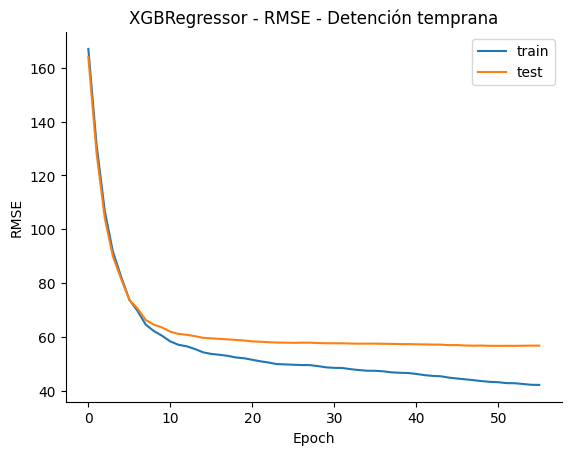

In [222]:
model = XGBRegressor(eval_metric='rmse', early_stopping_rounds=5)
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_set=eval_set, verbose=True)
test_pred = model.predict(x_test)
test_pred_rounded = [round(value, 0) for value in test_pred]
test_error = mean_squared_error(y_test, test_pred_rounded)
#Metricas de performance
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

sns.lineplot(x=x_axis, y=results['validation_0']['rmse'], label='train')
sns.lineplot(x=x_axis, y=results['validation_1']['rmse'], label='test')
sns.despine(left=False, bottom=False)
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.title('XGBRegressor - RMSE - Detención temprana')

El modelo sigue presentando overfit, pero la distancia entre train y test se ha reducido considerablemente llegando a una distancia de 6.6 puntos aproximadamente. Sin embargo, al revisar la grafica con el total de iteraciones (Epoch), se observa que el valor de RMSE se estabiliza mientras que el de training sigue decreciendo y es de común conocimiento que para MSE y RMSE entre menor sea el valor, mejor es la predicción.

Teniendo en cuenta que XGBoost es un conjunto de árboles de decisión, es normal que el overfitting ocurra a menos que se realize una optimización de hiperparametros. Aun así, lo realizado hasta el momento demuestra que puede haber una mejora considerable en el modelo.

#### Optimización hiperparametros

In [231]:
X = train[['mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
           'temp', 'hum', 'windspeed']]

y = train[['cnt']]

model = XGBRegressor()

grid = {
    'max_depth' : [i for i in range(3, 11)],
    'learning_rate': [i for i in np.linspace(0.01, 3, 10)],
    'n_estimators': [i for i in range(100, 1100, 100)],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1]
}


reg = GridSearchCV(estimator=model,
                   param_grid=grid,
                   scoring='neg_root_mean_squared_error',
                   verbose=3)

reg.fit(X, y)

print("Mejores parametros: ", reg.best_params_)
print("Menor RMSE: ", -reg.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-60.942 total time=   0.5s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-144.850 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-143.151 total time=   0.4s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-109.026 total time=   0.4s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-221.176 total time=   0.4s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500;, score=-100.811 total time=   2.5s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500;, score=-96.113 total time=   2.6s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500;, score=

In [ ]:
X = train[['mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
           'temp', 'hum', 'windspeed']]

y = train[['cnt']]

model = XGBRegressor()

grid = {
    'max_depth' : [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'colsample_bytree': [0.3, 0.7],
    #'subsample': [0.6, 0.7, 0.8, 0.9, 1]
}


reg = GridSearchCV(estimator=model,
                   param_grid=grid,
                   scoring='neg_root_mean_squared_error',
                   verbose=3)

reg.fit(X, y)

print("Mejores parametros: ", reg.best_params_)
print("Menor RMSE: ", -reg.best_score_)

In [233]:
model = XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=1000)
model.fit(x_train, y_train)
train_pred = model.predict(x_train)
train_error = mean_squared_error(y_train, train_pred, squared=False)
test_pred = model.predict(x_test)
test_error = mean_squared_error(y_test, test_pred, squared=False)

print(f'Train error: {train_error}')
print(f'Test error: {test_error}')

Train error: 49.22345156497919
Test error: 57.47632982000266


[0]	validation_0-rmse:218.29384	validation_1-rmse:215.54347
[1]	validation_0-rmse:216.53142	validation_1-rmse:213.78023
[2]	validation_0-rmse:214.74805	validation_1-rmse:211.98882
[3]	validation_0-rmse:213.37815	validation_1-rmse:210.62494
[4]	validation_0-rmse:211.63186	validation_1-rmse:208.86041
[5]	validation_0-rmse:209.97603	validation_1-rmse:207.17707
[6]	validation_0-rmse:208.25746	validation_1-rmse:205.43113
[7]	validation_0-rmse:206.58202	validation_1-rmse:203.72799
[8]	validation_0-rmse:204.90278	validation_1-rmse:202.03049
[9]	validation_0-rmse:203.55088	validation_1-rmse:200.68855
[10]	validation_0-rmse:201.98437	validation_1-rmse:199.10000
[11]	validation_0-rmse:200.38622	validation_1-rmse:197.49056
[12]	validation_0-rmse:199.08626	validation_1-rmse:196.20089
[13]	validation_0-rmse:197.51200	validation_1-rmse:194.60140
[14]	validation_0-rmse:195.98800	validation_1-rmse:193.05725
[15]	validation_0-rmse:194.43749	validation_1-rmse:191.49630
[16]	validation_0-rmse:192.97341	v

Text(0.5, 1.0, 'XGBRegressor - RMSE - Detención temprana')

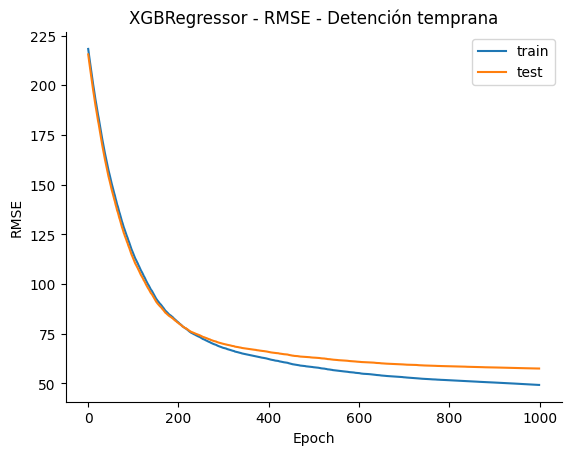

In [234]:
model = XGBRegressor(eval_metric='rmse', colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=1000)
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_set=eval_set, verbose=True)
test_pred = model.predict(x_test)
test_pred_rounded = [round(value, 0) for value in test_pred]
test_error = mean_squared_error(y_test, test_pred_rounded)
#Metricas de performance
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

sns.lineplot(x=x_axis, y=results['validation_0']['rmse'], label='train')
sns.lineplot(x=x_axis, y=results['validation_1']['rmse'], label='test')
sns.despine(left=False, bottom=False)
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.title('XGBRegressor - RMSE')

[0]	validation_0-rmse:218.29384	validation_1-rmse:215.54347
[1]	validation_0-rmse:216.53142	validation_1-rmse:213.78023
[2]	validation_0-rmse:214.74805	validation_1-rmse:211.98882
[3]	validation_0-rmse:213.37815	validation_1-rmse:210.62494
[4]	validation_0-rmse:211.63186	validation_1-rmse:208.86041
[5]	validation_0-rmse:209.97603	validation_1-rmse:207.17707
[6]	validation_0-rmse:208.25746	validation_1-rmse:205.43113
[7]	validation_0-rmse:206.58202	validation_1-rmse:203.72799
[8]	validation_0-rmse:204.90278	validation_1-rmse:202.03049
[9]	validation_0-rmse:203.55088	validation_1-rmse:200.68855
[10]	validation_0-rmse:201.98437	validation_1-rmse:199.10000
[11]	validation_0-rmse:200.38622	validation_1-rmse:197.49056
[12]	validation_0-rmse:199.08626	validation_1-rmse:196.20089
[13]	validation_0-rmse:197.51200	validation_1-rmse:194.60140
[14]	validation_0-rmse:195.98800	validation_1-rmse:193.05725
[15]	validation_0-rmse:194.43749	validation_1-rmse:191.49630
[16]	validation_0-rmse:192.97341	v

Text(0.5, 1.0, 'XGBRegressor - RMSE')

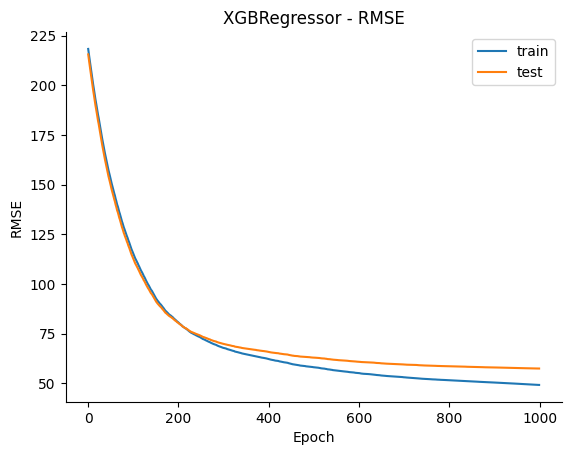

In [236]:
model = XGBRegressor(eval_metric='rmse', colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=1000, early_stopping_rounds=5)
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_set=eval_set, verbose=True)
test_pred = model.predict(x_test)
test_pred_rounded = [round(value, 0) for value in test_pred]
test_error = mean_squared_error(y_test, test_pred_rounded)
#Metricas de performance
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

sns.lineplot(x=x_axis, y=results['validation_0']['rmse'], label='train')
sns.lineplot(x=x_axis, y=results['validation_1']['rmse'], label='test')
sns.despine(left=False, bottom=False)
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.title('XGBRegressor - RMSE')